In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [72]:
img = cv2.imread('Frames/frame90.jpg')

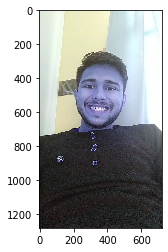

In [73]:
plt.imshow(img,cmap='gray')

Converting to Monochrome

In [74]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Histogram Equalisation

In [75]:
# equ = cv2.equalizeHist(img)

# fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
# ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)#row=0, col=0
# ax[0].set_title("Original Image")


# ax[1].imshow(equ, cmap="gray", vmin=0, vmax=255)#row=0, col=1
# ax[1].set_title("Normalized Image")

# plt.show()

In [76]:
equ = img

In [77]:
face_cascade = cv2.CascadeClassifier('FaceDetectionXML/frontface_alt.xml')
eye_cascade = cv2.CascadeClassifier('FaceDetectionXML/eye.xml')

In [78]:
margin = 30
faces = face_cascade.detectMultiScale(gray, 1.3, 3)
for (x,y,w,h) in faces:
    croppedFace = equ[y-margin-10:y+h+margin+10, x-margin:x+w+margin]
            
cv2.imshow('asd',croppedFace)
cv2.waitKey()
cv2.destroyAllWindows()


In [79]:
w=130 #you can change this in a multiple of 2
h=86
finalImage=cv2.resize(croppedFace,(w ,h))

In [80]:
cv2.imshow('asd',finalImage)
cv2.waitKey()
cv2.destroyAllWindows()

In [81]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array

In [82]:
Emotions = [(0,'Angry'),(1,'Fear'),(2,'Sad'),(3,'Happy'),(4,'Neutral'),(5,'Surprised')]

In [83]:
model = load_model('model.h5')

In [84]:
image = finalImage.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [85]:
arr = model.predict(image)[0]
print(arr)


[4.8570987e-03 9.1303926e-04 2.4037666e-03 9.8447716e-01 6.3448423e-03
 9.9906104e-04 4.9382729e-06]


In [86]:
EmotionIndex, = np.where(arr == max(arr))
Emotions[EmotionIndex[0]][1]

'Happy'